In [38]:

from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB
from numpy import float32, uint8, unique
from matplotlib.pyplot import show, imshow
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'

In [23]:
def load_image(path):
    return cvtColor(imread(path), COLOR_BGR2RGB)

img_bricks = load_image('./bricks.jpg')
img_sun = load_image('./sun-image.jpg')

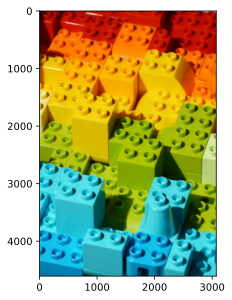

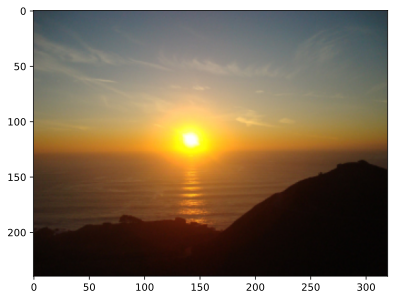

In [15]:
show(imshow(img_bricks))
show(imshow(img_sun))

In [18]:
def kmeans_image(img_RGB):
    # Reshape image to an Mx3 array
    img_data = img_RGB.reshape(-1, 3)
    
    # Find the number of unique RGB values
    print(len(unique(img_data, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')
    
    # Specify the algorithm's termination criteria
    criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)
    
    # Run the k-means clustering algorithm on the pixel values
    compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)
    
    # Apply the RGB values of the cluster centers to all pixel labels
    colours = centers[labels].reshape(-1, 3)
    
    # Find the number of unique RGB values
    print(len(unique(colours, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')
    
    return colours.reshape(img_RGB.shape).astype(uint8)

img_bricks_kmeans = kmeans_image(img_bricks)
img_sun_kmeans = kmeans_image(img_sun)

360423 unique RGB values out of 14155776 pixels
5 unique RGB values out of 14155776 pixels
25086 unique RGB values out of 76800 pixels
5 unique RGB values out of 76800 pixels


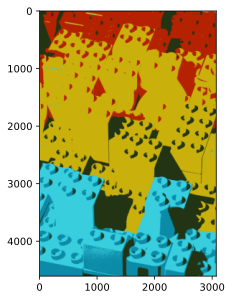

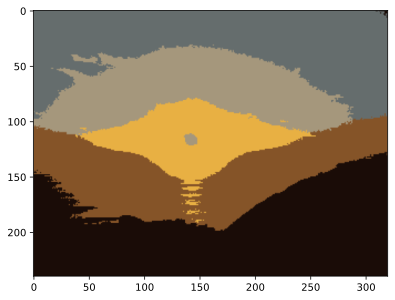

In [21]:
show(imshow(img_bricks_kmeans))
show(imshow(img_sun_kmeans))


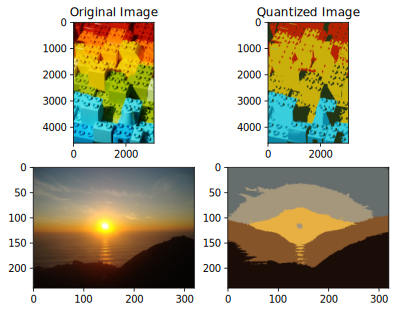

In [39]:
#| label: fig-img-kmeans
#| fig-cap: OpenCV k-means clustering applied to two images.

f, axarr = plt.subplots(2,2)

axarr[0][0].imshow(img_bricks)
axarr[0][0].set_title('Original Image')

axarr[0][1].imshow(img_bricks_kmeans)
axarr[0][1].set_title('Quantized Image')

axarr[1][0].imshow(img_sun)

axarr[1][1].imshow(img_sun_kmeans)

plt.show()